In [1]:
import pandas as pd
df_wo_ohe = pd.read_csv("tmp/ml_ready_2024-11-30.csv")
df_ohe = pd.read_csv("tmp/ml_ready_ohe_2024-11-30.csv")

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = df_wo_ohe

# Dividir los datos
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Importancia de características
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


      Feature  Importance
5  total_area    0.400783
4       rooms    0.283435
0   antiquity    0.201630
2     garages    0.065021
1    bedrooms    0.028083
3   bathrooms    0.021049


Varianza explicada por cada componente:
[0.36368283 0.16823527 0.16475312 0.1498929  0.0955106  0.05792529]

Matriz de pesos (contribución de cada característica):
   antiquity  bedrooms   garages  bathrooms     rooms  total_area
0   0.055512  0.561902  0.181023   0.261007  0.505957    0.569472
1  -0.705131 -0.179242  0.601540   0.319555 -0.078802   -0.022070
2   0.697899 -0.203636  0.636621   0.183366 -0.180321    0.006697
3   0.091498 -0.088165 -0.408308   0.891247 -0.086143   -0.124086
4   0.063200 -0.305799  0.068822   0.009930  0.825762   -0.464517
5  -0.016715 -0.713713 -0.169242  -0.041432  0.126410    0.666330


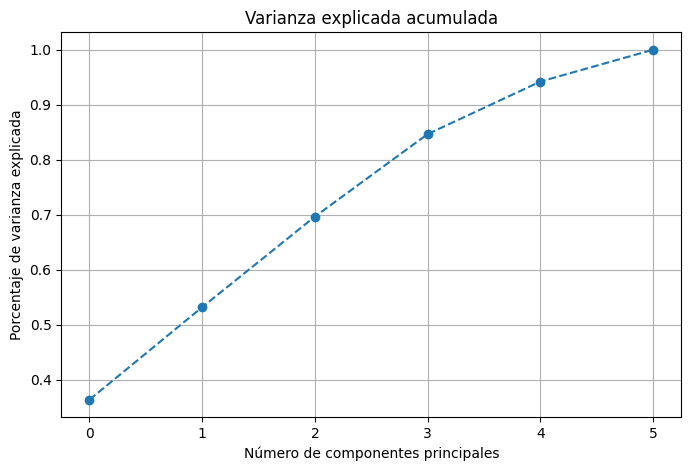

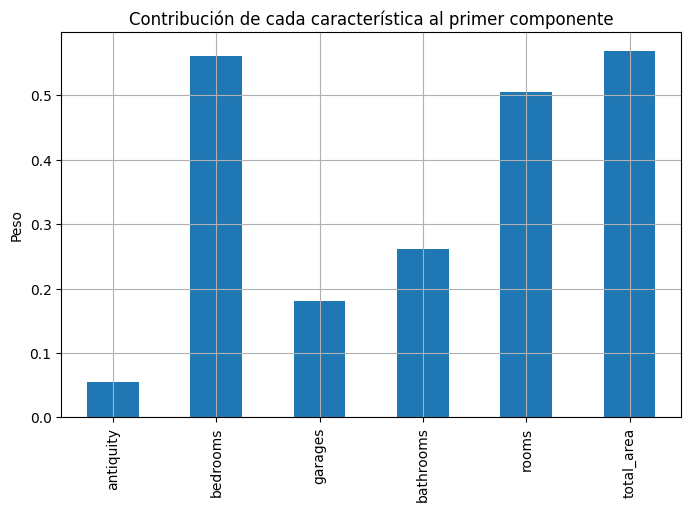

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df_wo_ohe.drop(columns=['price'])
#df = df_ohe.drop(columns=['price'])

# 1. Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 2. Ajustar PCA
pca = PCA()
pca.fit(scaled_data)

# 3. Varianza explicada
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
print(explained_variance)

# 4. Matriz de componentes principales (pesos de cada característica)
components = pca.components_
features = df.columns
components_df = pd.DataFrame(components, columns=features)
print("\nMatriz de pesos (contribución de cada característica):")
print(components_df)

# 5. Visualización de la varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.show()

# 6. Visualización de la contribución de características para el primer componente
plt.figure(figsize=(8, 5))
components_df.loc[0].plot(kind='bar')
plt.title('Contribución de cada característica al primer componente')
plt.ylabel('Peso')
plt.grid()
plt.show()


In [12]:
# Esto muestra la 'variabilidad' que aporta cada componente
# (lo que representa en porcentaje)
pca.explained_variance_ratio_

array([0.36368283, 0.16823527, 0.16475312, 0.1498929 , 0.0955106 ,
       0.05792529])

In [13]:
# Y el acumulado agregando dimensiones
np.cumsum(pca.explained_variance_ratio_)

array([0.36368283, 0.5319181 , 0.69667121, 0.84656411, 0.94207471,
       1.        ])

Varianza explicada acumulada: [0.36368283 0.5319181  0.69667121 0.84656411 0.94207471 1.        ]


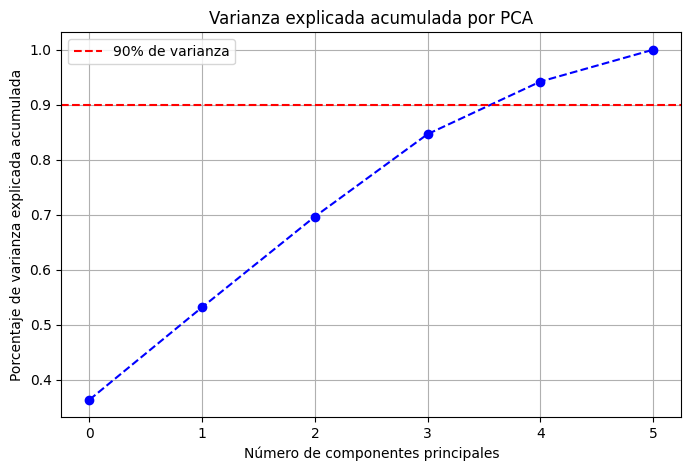

In [14]:

# 1. Varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% de varianza')
plt.legend()
plt.grid()
plt.show()

In [19]:

# Determinar el número de componentes necesarios para capturar >90% de la varianza
n_components = np.argmax(explained_variance_ratio >= 0.9) + 1
print(f"Se necesitan {n_components} componentes para explicar al menos el 90% de la varianza.")

# 2. Contribución de las características originales a los primeros componentes
components = pca.components_[:n_components]
feature_contributions = pd.DataFrame(
    components.T,
    index=df.columns,
    columns=[f'Componente {i+1}' for i in range(n_components)]
)

Se necesitan 5 componentes para explicar al menos el 90% de la varianza.


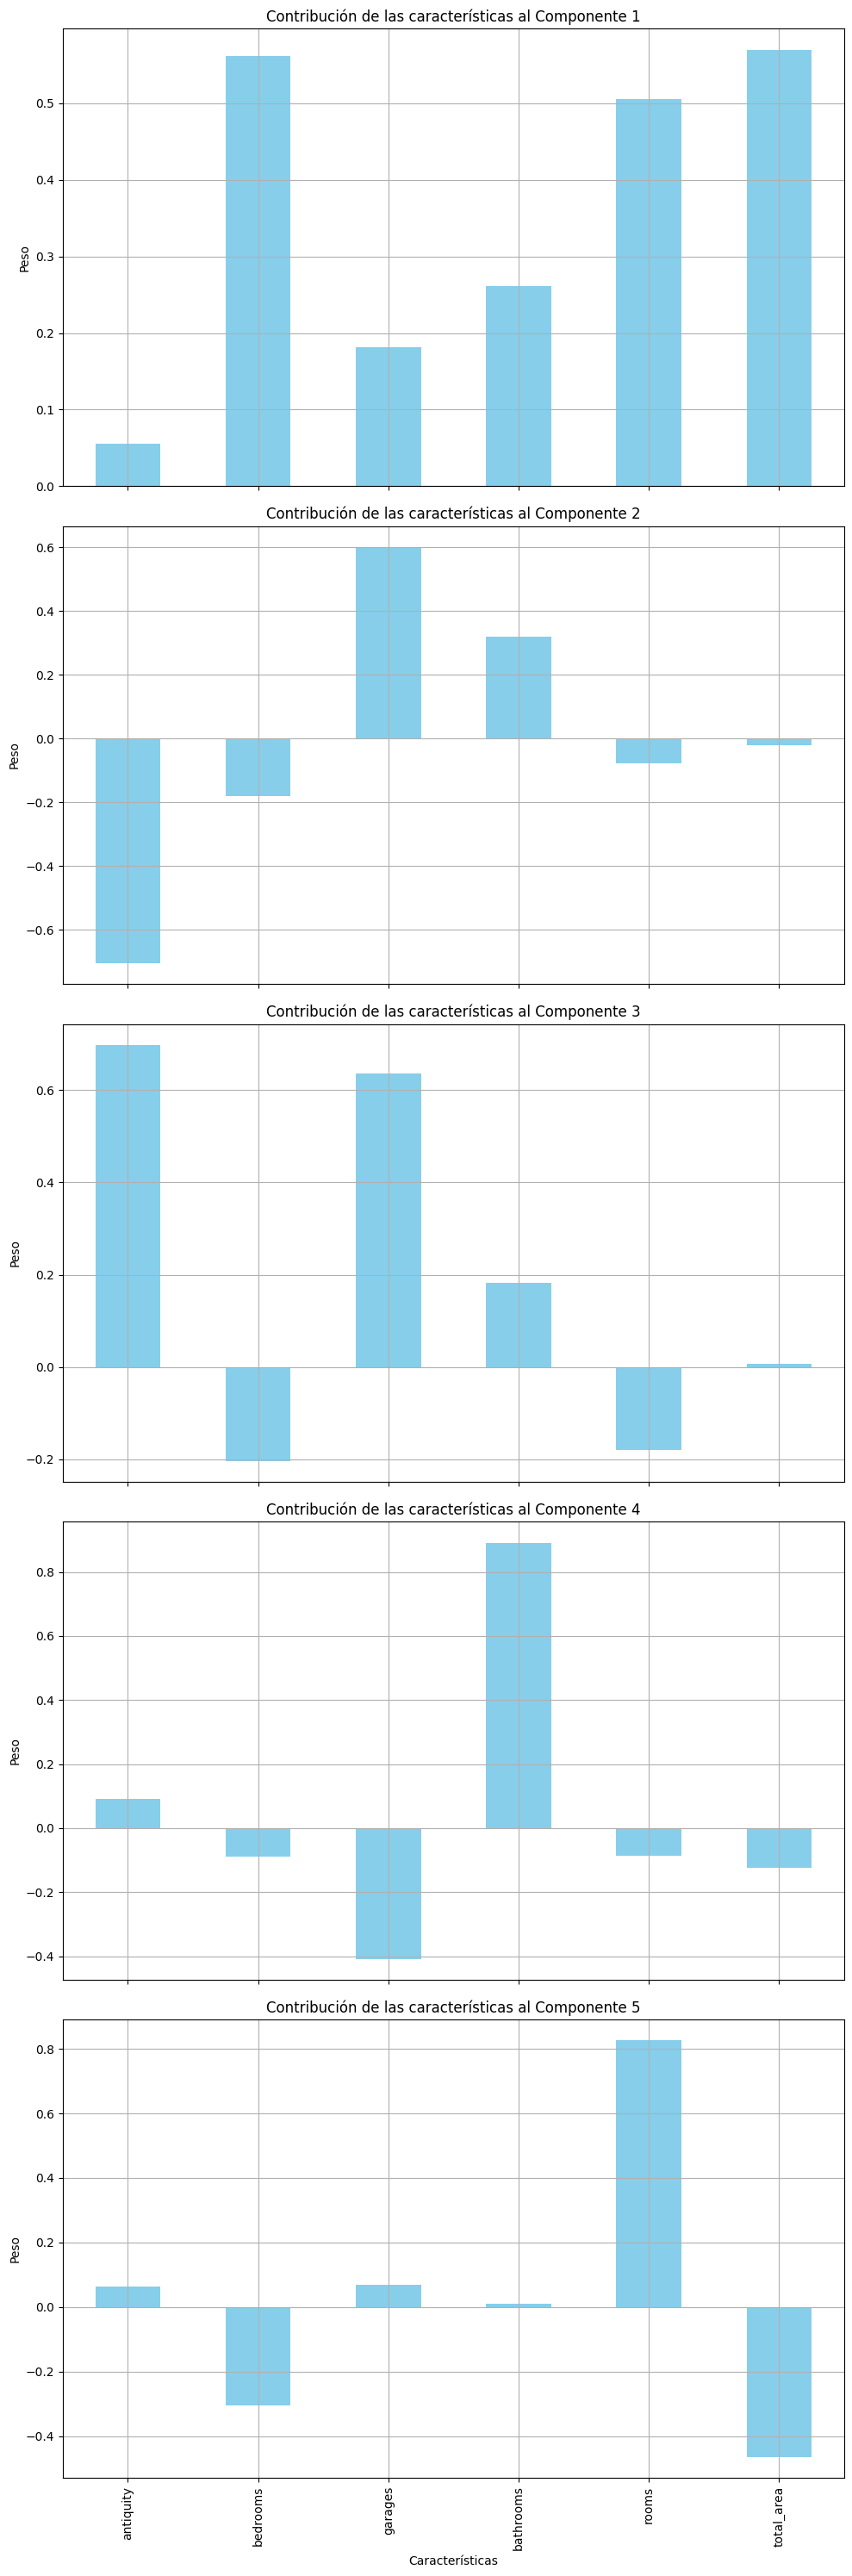

In [18]:
# Graficar contribución de las características a los primeros 5 componentes principales
n_components = 5  # Número de componentes principales seleccionados

# Subplot para visualizar las contribuciones
fig, axes = plt.subplots(n_components, 1, figsize=(10, 6 * n_components), sharex=True)

for i in range(n_components):
    ax = axes[i]
    feature_contributions[f'Componente {i+1}'].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Contribución de las características al Componente {i+1}')
    ax.set_ylabel('Peso')
    ax.grid()

plt.xlabel('Características')
plt.tight_layout()
plt.show()


In [43]:
from pycaret.regression import *
clf1 = setup(data = df_wo_ohe, target = 'price', low_variance_threshold = 0.3)

,Description,Value
0,Session id,3614
1,Target,price
2,Target type,Regression
3,Original data shape,"(15209, 7)"
4,Transformed data shape,"(15209, 4)"
5,Transformed train set shape,"(10646, 4)"
6,Transformed test set shape,"(4563, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [44]:
# Retrieve the processed data
X_final = get_config('X')  # Features after preprocessing

In [45]:
X_final

,antiquity,bedrooms,garages,bathrooms,rooms,total_area
14965,26.0,1.0,0.0,1.0,1.0,40.0
2549,6.0,1.0,0.0,1.0,1.0,28.0
5355,80.0,1.0,1.0,2.0,1.0,60.0
5880,50.0,2.0,1.0,2.0,3.0,92.0
8017,28.0,1.0,0.0,1.0,1.0,35.0
...,...,...,...,...,...,...
1044,40.0,1.0,0.0,1.0,1.0,38.0
10589,28.0,2.0,0.0,2.0,3.0,80.0
4969,50.0,1.0,0.0,2.0,2.0,65.0
3707,26.0,1.0,0.0,1.0,1.0,30.0


In [34]:

from pycaret.regression import *
clf1 = setup(data = df_wo_ohe, target = 'price', feature_selection = True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 10646, number of used features: 6
[LightGBM] [Info] Start training from score 547478.752113


,Description,Value
0,Session id,4743
1,Target,price
2,Target type,Regression
3,Original data shape,"(15209, 7)"
4,Transformed data shape,"(15209, 2)"
5,Transformed train set shape,"(10646, 2)"
6,Transformed test set shape,"(4563, 2)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [46]:
# Retrieve the processed data
X_final = get_config('X')  # Features after preprocessing

In [47]:
X_final

,antiquity,bedrooms,garages,bathrooms,rooms,total_area
14965,26.0,1.0,0.0,1.0,1.0,40.0
2549,6.0,1.0,0.0,1.0,1.0,28.0
5355,80.0,1.0,1.0,2.0,1.0,60.0
5880,50.0,2.0,1.0,2.0,3.0,92.0
8017,28.0,1.0,0.0,1.0,1.0,35.0
...,...,...,...,...,...,...
1044,40.0,1.0,0.0,1.0,1.0,38.0
10589,28.0,2.0,0.0,2.0,3.0,80.0
4969,50.0,1.0,0.0,2.0,2.0,65.0
3707,26.0,1.0,0.0,1.0,1.0,30.0


In [48]:
from pycaret.regression import *
reg1 = setup(data = df_wo_ohe, target = 'price', remove_multicollinearity = True, multicollinearity_threshold = 0.3)

,Description,Value
0,Session id,6699
1,Target,price
2,Target type,Regression
3,Original data shape,"(15209, 7)"
4,Transformed data shape,"(15209, 4)"
5,Transformed train set shape,"(10646, 4)"
6,Transformed test set shape,"(4563, 4)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


# Feature selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Dividir los datos
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Importancia de características
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importances)


# Evaluar correlación
Seleccionar las características con correlaciones altas (eliminar aquellas con correlación cercana a cero)

In [25]:
import pandas as pd

df_wo_ohe = pd.read_csv("tmp/ml_ready_2024-11-30.csv")
df = df_wo_ohe
# Calcula la correlación
correlation = df.corr()
print(correlation['price'].sort_values(ascending=False))


price         1.000000
total_area    0.474742
rooms         0.403522
bedrooms      0.306464
garages       0.277460
bathrooms     0.181177
antiquity    -0.062964
Name: price, dtype: float64


# RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modelo base
model = LinearRegression()

# RFE
selector = RFE(model, n_features_to_select=3)
selector = selector.fit(X, y)

# Características seleccionadas
print(X.columns[selector.support_])


Index(['bedrooms', 'garages', 'rooms'], dtype='object')
